In [0]:
#mount drive

from google.colab import drive
drive.mount('/content/drive')


from glob import glob
import IPython.display
import PIL.Image

import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.measure import block_reduce
from sklearn.metrics import roc_auc_score, confusion_matrix

from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.models import Sequential, model_from_json
from tensorflow.python.keras.utils import np_utils
import cv2

from sklearn import *

#load data

X_train = np.load('/content/drive/My Drive/Input/X_train_array.npy')
X_test = np.load('/content/drive/My Drive/Input/X_test_array.npy')
X_val = np.load('/content/drive/My Drive/Input/X_val_array.npy')

y_train = np.load('/content/drive/My Drive/Input/y_train_array.npy')
y_test = np.load('/content/drive/My Drive/Input/y_test_array.npy')
y_val = np.load('/content/drive/My Drive/Input/y_val_array.npy')

# define an empty sequential structure 

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np 
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Using TensorFlow backend.


W0901 15:24:45.602644 140139874862976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0901 15:24:45.807615 140139874862976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0901 15:24:45.826767 140139874862976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0901 15:24:45.901041 140139874862976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0901 15:24:45.902543 1401398748

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)       

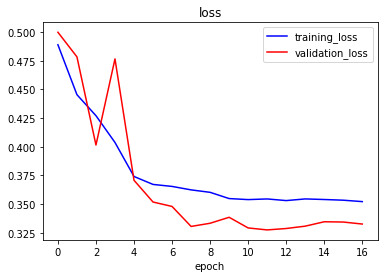

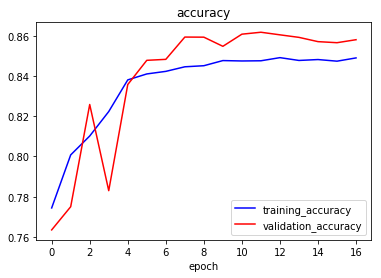

Loss = 0.328022
Accuracy: 0.857611
Precision: 0.837794
Recall: 0.804602
F1 score: 0.820862
Cohens kappa: 0.702791
ROC AUC: 0.849182
Confusion matrix:
[[11677  1388]
 [ 1741  7169]]


In [0]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
model.add(Dropout(0.1))

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.4))


# adding last layers - flattening and Dence
model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

### Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.1, patience=1, verbose=1, min_lr=0.00001)
mc = ModelCheckpoint('model9b.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=100,        # number of epochs
    batch_size=32,  # define batch size
    verbose=2,              # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

#save weights
model.save_weights('/content/drive/My Drive/Model weights/model_9b.h5')

#show results
plt.plot(model.history.history['loss'], color='blue', label="training_loss")
plt.plot(model.history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(model.history.history['acc'], color='blue', label="training_accuracy")
plt.plot(model.history.history['val_acc'], color='red', label="validation_accuracy")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

# evaluate model
loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % loss)

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

###########
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

# No Dropout

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 16, 16, 32)       

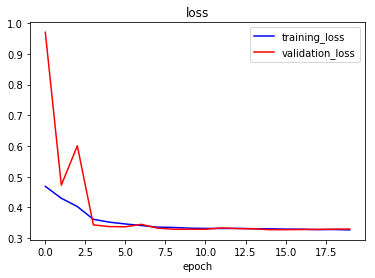

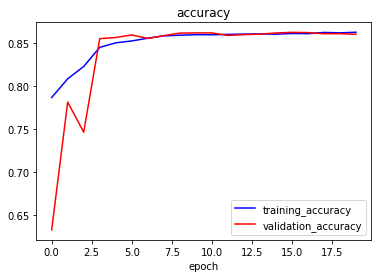

Loss = 0.323190
Accuracy: 0.862389
Precision: 0.855349
Recall: 0.795062
F1 score: 0.824104
Cohens kappa: 0.711339
ROC AUC: 0.851683
Confusion matrix:
[[11867  1198]
 [ 1826  7084]]


In [0]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
#model.add(Dropout(0.1))

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
#model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
#model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
#model.add(Dropout(0.4))


# adding last layers - flattening and Dence
model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.4))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

### Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.1, patience=1, verbose=1, min_lr=0.00001)
mc = ModelCheckpoint('model_9b_noDO.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=100,        # number of epochs
    batch_size=32,  # define batch size
    verbose=2,              # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

#save weights
model.save_weights('/content/drive/My Drive/Model weights/model_9b_noDO.h5')

#show results
plt.plot(model.history.history['loss'], color='blue', label="training_loss")
plt.plot(model.history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(model.history.history['acc'], color='blue', label="training_accuracy")
plt.plot(model.history.history['val_acc'], color='red', label="validation_accuracy")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

# evaluate model
loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % loss)

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

###########
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

# Single Conv2D Filters

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_16 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 64)         

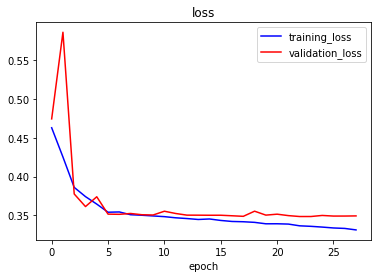

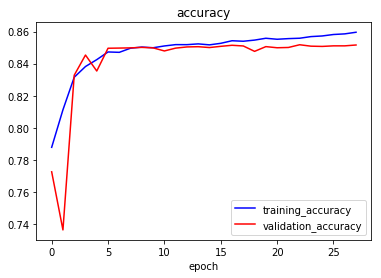

Loss = 0.346205
Accuracy: 0.849056
Precision: 0.839835
Recall: 0.775645
F1 score: 0.806465
Cohens kappa: 0.683067
ROC AUC: 0.837383
Confusion matrix:
[[11747  1318]
 [ 1999  6911]]


In [0]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
#model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
#model.add(Dropout(0.1))

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
#model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
#model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
#model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
#model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
#model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
#model.add(Dropout(0.4))


# adding last layers - flattening and Dence
model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.4))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

### Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.1, patience=1, verbose=1, min_lr=0.00001)
mc = ModelCheckpoint('model_9_1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=100,        # number of epochs
    batch_size=32,  # define batch size
    verbose=2,              # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

#save weights
model.save_weights('/content/drive/My Drive/Model weights/model_9_1.h5')

#show results
plt.plot(model.history.history['loss'], color='blue', label="training_loss")
plt.plot(model.history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(model.history.history['acc'], color='blue', label="training_accuracy")
plt.plot(model.history.history['val_acc'], color='red', label="validation_accuracy")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

# evaluate model
loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % loss)

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

###########
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

# Small Drop out - The best one

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_29 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 32)       

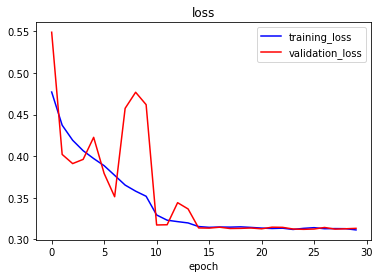

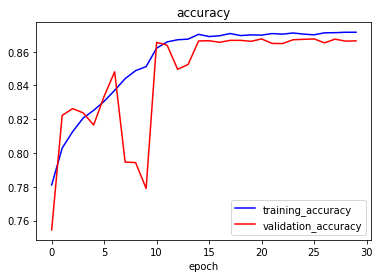

Loss = 0.308483
Accuracy: 0.869761
Precision: 0.855263
Recall: 0.817059
F1 score: 0.835725
Cohens kappa: 0.727932
ROC AUC: 0.861381
Confusion matrix:
[[11833  1232]
 [ 1630  7280]]


In [0]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
model.add(Dropout(0.1))

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2)) 
model.add(Dropout(0.1))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.1))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.1))


# adding last layers - flattening and Dence
model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(16))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

### Compile model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', mode='max', factor=0.1, patience=3, verbose=1, min_lr=0.00001)
mc = ModelCheckpoint('model_9_2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

m = model.fit(
    X_train,            # features (as dense inputs)
    y_train,            # labels
    epochs=100,        # number of epochs
    batch_size=32,  # define batch size
    verbose=2,              # the most extended verbose
    validation_data=(       
        X_val,          # the validation split that we did before
        y_val
    ),
    callbacks=[es, mc, reduce_lr]
    )

#save weights
model.save_weights('/content/drive/My Drive/Model weights/model_9_2.h5')

#show results
plt.plot(model.history.history['loss'], color='blue', label="training_loss")
plt.plot(model.history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(model.history.history['acc'], color='blue', label="training_accuracy")
plt.plot(model.history.history['val_acc'], color='red', label="validation_accuracy")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

# evaluate model
loss,_ = model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % loss)

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

###########
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)